# Assignment 2: Plotting & Models¶
**Course:** PHYS 345 - Computational Physics

**Due Date:** 1/30/2026

## Problem 1: 

In [1]:
# 1. Load the Data:
import numpy as np
import matplotlib.pyplot as plt
file = 'drop_data.csv'
drop = np.loadtxt(file, delimiter = ',', skiprows = 1)
# a : The skip row command is telling the code that when we load the data we want to skip the first row of information.
drop # Looking at the data
time = drop[:, 0] # this is the time column (s)
vel = drop[:, 1] # this is the velocity column (m/s)
drop

array([[ 0.        ,  1.14161705],
       [ 0.33333333,  5.65205891],
       [ 0.66666667,  6.91363926],
       [ 1.        ,  7.73071926],
       [ 1.33333333, 11.41660405],
       [ 1.66666667, 13.39190253],
       [ 2.        , 17.12317422],
       [ 2.33333333, 18.00122161],
       [ 2.66666667, 18.54507366],
       [ 3.        , 20.67204574],
       [ 3.33333333, 22.21381616],
       [ 3.66666667, 24.95987249],
       [ 4.        , 24.56374749],
       [ 4.33333333, 27.47036478],
       [ 4.66666667, 29.56418015],
       [ 5.        , 26.25439926],
       [ 5.33333333, 30.74089891],
       [ 5.66666667, 30.03904637],
       [ 6.        , 31.64380562],
       [ 6.33333333, 33.06110307],
       [ 6.66666667, 32.93614965],
       [ 7.        , 35.6273346 ],
       [ 7.33333333, 31.40580343],
       [ 7.66666667, 33.97014178],
       [ 8.        , 37.57818736]])

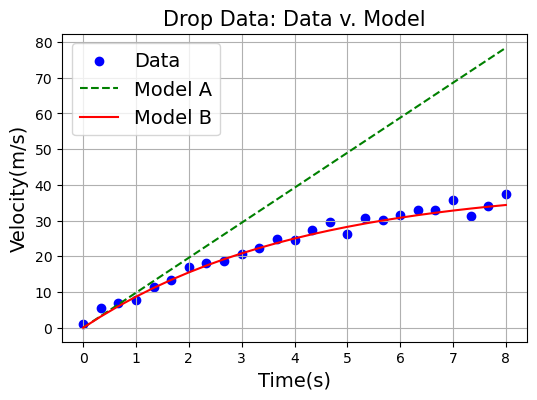

In [2]:
# 2. Define Two Functions: 
# What I need: model for A, model for B, gravity, and a graph
# given initial terminal velocity = 40 m/s
g = 9.8 # m/s**2
velterm = 40 # m/s
# a
def modelA(time): 
    return g*time
# b
def modelB(time, velterm):
    return velterm * (1-np.exp(-g*time/velterm))
# c
velA = modelA(time)
velB = modelB(time, velterm)
plt.figure(figsize=(6,4))
plt.scatter(time, vel, color = 'blue', label = 'Data')
plt.plot(time, velA, 'g--', label = 'Model A')
plt.plot(time, velB, 'r-', label = 'Model B')
plt.xlabel('Time(s)', fontsize = 14)
plt.ylabel('Velocity(m/s)', fontsize = 14)
plt.title('Drop Data: Data v. Model', fontsize = 15)
plt.legend(fontsize = 14)
plt.grid(True)
plt.show()

In [3]:
# 3 
# From observing the graph the ideal model stops being a good representation at about the
# One second (10 m/s) mark. That's where we begin to see the model (green dash) begin to diverge from the data points (blue dots)

## Problem 2: 

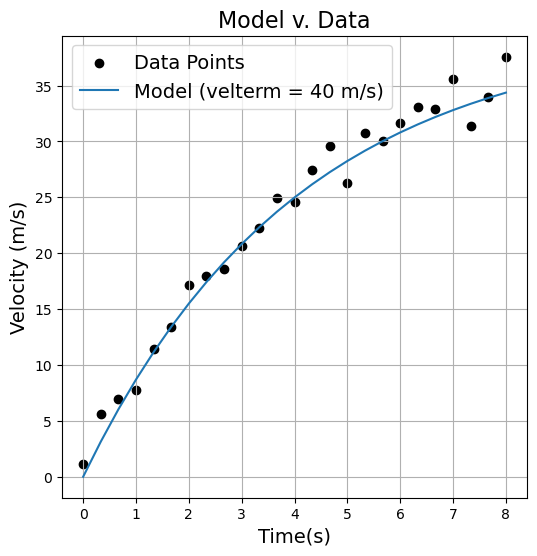

In [4]:
# 1. 
def plot_model_comparison(time, vel, velguess):
    velmodel = modelB(time, velguess)
    plt.figure(figsize=(6,6))
    plt.scatter(time, vel, color = 'black', label = 'Data Points')
    plt.plot(time, velmodel, label = f'Model (velterm = {velguess} m/s)')

    plt.xlabel('Time(s)', fontsize = 14)
    plt.ylabel('Velocity (m/s)', fontsize = 14)
    plt.title('Model v. Data', fontsize = 16)
    plt.legend(fontsize = 14)
    plt.grid(True)
    plt.show()
plot_model_comparison(time, vel, 40)  

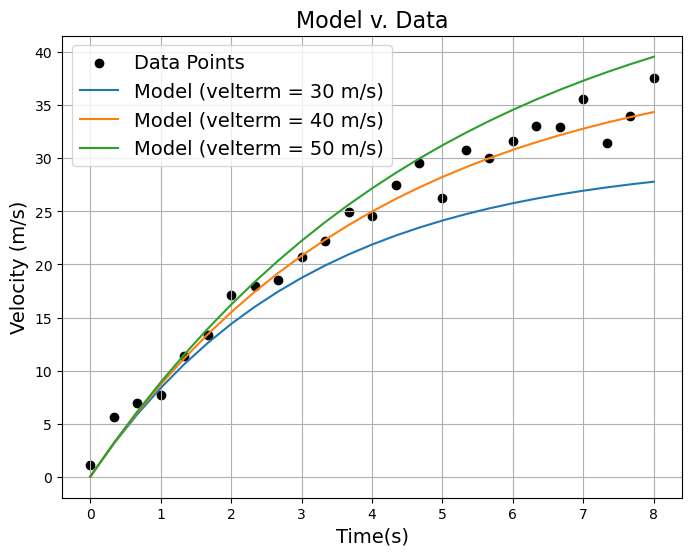

In [5]:
# 2. & 3.
# Now for multiple guesses, I need to add in the for loop
def plot_model_comparison(time, vel, velguess):
    plt.figure(figsize = (8,6))
    plt.scatter(time, vel, color = 'black', label = 'Data Points')
    # for loop goes here. I want the for loop to be data points
    for i in velguess:
        velmodel = modelB(time, i)
        plt.plot(time, velmodel, label = f'Model (velterm = {i} m/s)')

    plt.xlabel('Time(s)', fontsize = 14)
    plt.ylabel('Velocity (m/s)', fontsize = 14)
    plt.title('Model v. Data', fontsize = 16)
    plt.legend(fontsize = 14)
    plt.grid(True)
    plt.show()
plot_model_comparison(time, vel, [30, 40, 50])

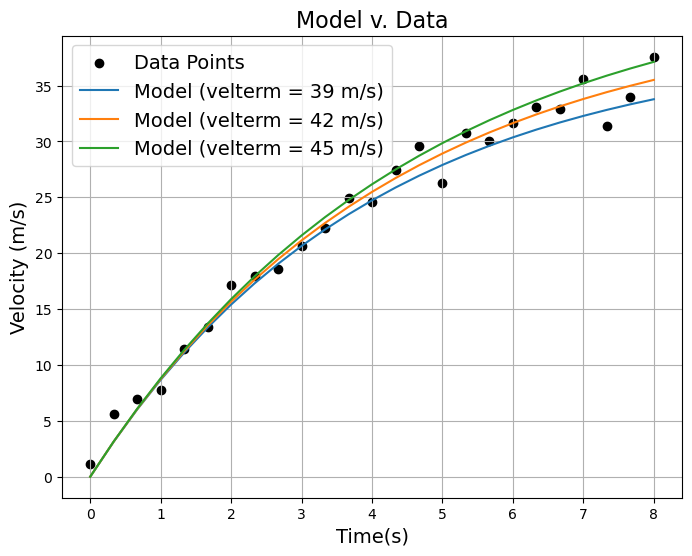

In [6]:
# 4.
# Based on the graph 40 m/s best represents the given data. With a change in terminal velocity 
# we should see the graph either elongate or get "squished". With higher terminal velocity causing the model to go further up before curving.
# with a lower terminal velocity shrinking the whole graph and the curve will happen "faster". 

# 5.
plot_model_comparison(time, vel, [39, 42, 45])
# From the new guesses I believe that 40 m/s fits the data best. Based off the values I added to the guess, 40 is inbetween the range and I believe 
# it will still be capturing the most points. I agree with this expectation because based off model B that introduced the air resistance the object's terminal velocity will be 40. 


## Problem 3: 

<function matplotlib.pyplot.show(close=None, block=None)>

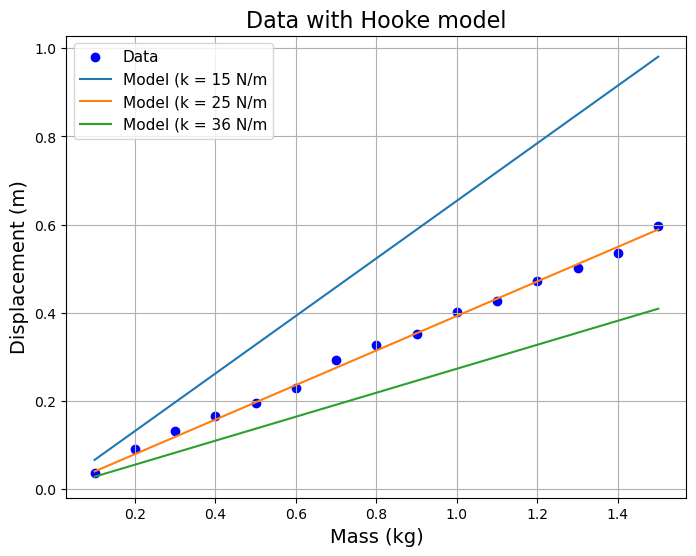

In [7]:
# Hooke's Law: F = k * x  where k is the spring constant (N/m)
# mg = k*x 
# x = g/k * m
# 1. 
import numpy as np
import matplotlib.pyplot as plt
problem3 = np.loadtxt('spring_data.csv', delimiter = ',', skiprows = 1)
mass = problem3[:,0] # the mass of the data (kg)
dist = problem3[:, 1] # the observed displacement (m)
problem3 # looking at the data
g = 9.81 # gravity (m/s**2)
def spring_model(mass, k):
    return (g/k * mass)
springconsts = [15, 25, 36]
# 2.
plt.figure(figsize = (8,6))
plt.scatter(mass, dist, color = 'blue', label = "Data")
for i in springconsts:
    distmodel = spring_model(mass, i)
    plt.plot(mass, distmodel, label = f'Model (k = {i} N/m')
plt.xlabel('Mass (kg)', fontsize = 14)
plt.ylabel('Displacement (m)', fontsize = 14)
plt.title('Data with Hooke model', fontsize = 16)
plt.legend(fontsize = 11)
plt.grid(True)
plt.show
# a. 
# From the graph I can see that a k value of 25 N/m creates the best line for the data

In [8]:
# 3. 
# a. 
kbest = 25
distmodelbest = spring_model(dist,kbest) 
Rbest = distmodel - distmodelbest
bestarray = [distmodel, distmodelbest, Rbest]
print(bestarray)
# b. 
MSE = np.mean(Rbest**2)
print('MSE for k =', kbest, 'N/m is', MSE) # Mean squared error for the model where k = 25

# c. MSE for the other k values
def MSEvalues(mass, dist, k):
    distmodel = spring_model(mass, k)
    Resids = dist - distmodel
    return np.mean(Resids**2)
for i in springconsts:
    lastpart = MSEvalues(mass, dist, i)
    print(f"k = {i} N/m -> MSE = {lastpart}")

[array([0.02725, 0.0545 , 0.08175, 0.109  , 0.13625, 0.1635 , 0.19075,
       0.218  , 0.24525, 0.2725 , 0.29975, 0.327  , 0.35425, 0.3815 ,
       0.40875]), array([0.01424463, 0.03543406, 0.05144856, 0.06479393, 0.07594078,
       0.08986143, 0.11499632, 0.12769569, 0.13794267, 0.15766607,
       0.16735423, 0.18467295, 0.19709158, 0.2098405 , 0.2338151 ]), array([0.01300537, 0.01906594, 0.03030144, 0.04420607, 0.06030922,
       0.07363857, 0.07575368, 0.09030431, 0.10730733, 0.11483393,
       0.13239577, 0.14232705, 0.15715842, 0.1716595 , 0.1749349 ])]
MSE for k = 25 N/m is 0.011574241844382608
k = 15 N/m -> MSE = 0.05636883464359958
k = 25 N/m -> MSE = 9.053080800122002e-05
k = 36 N/m -> MSE = 0.01210957088335197


In [9]:
# 4. 
# By increasing k the slope becomes flatter. When I move k away from the "best" value the MSE increases in value for k < k "best"
# and when k > k "best" then the MSE value decreases. 